# Exercício 2
## Plotar a evolução temporal da resposta ao degrau do sistema do Exemplo 6.2 como $f(t), f(KT)$ e a solução da equação recursiva $f(KT)$.

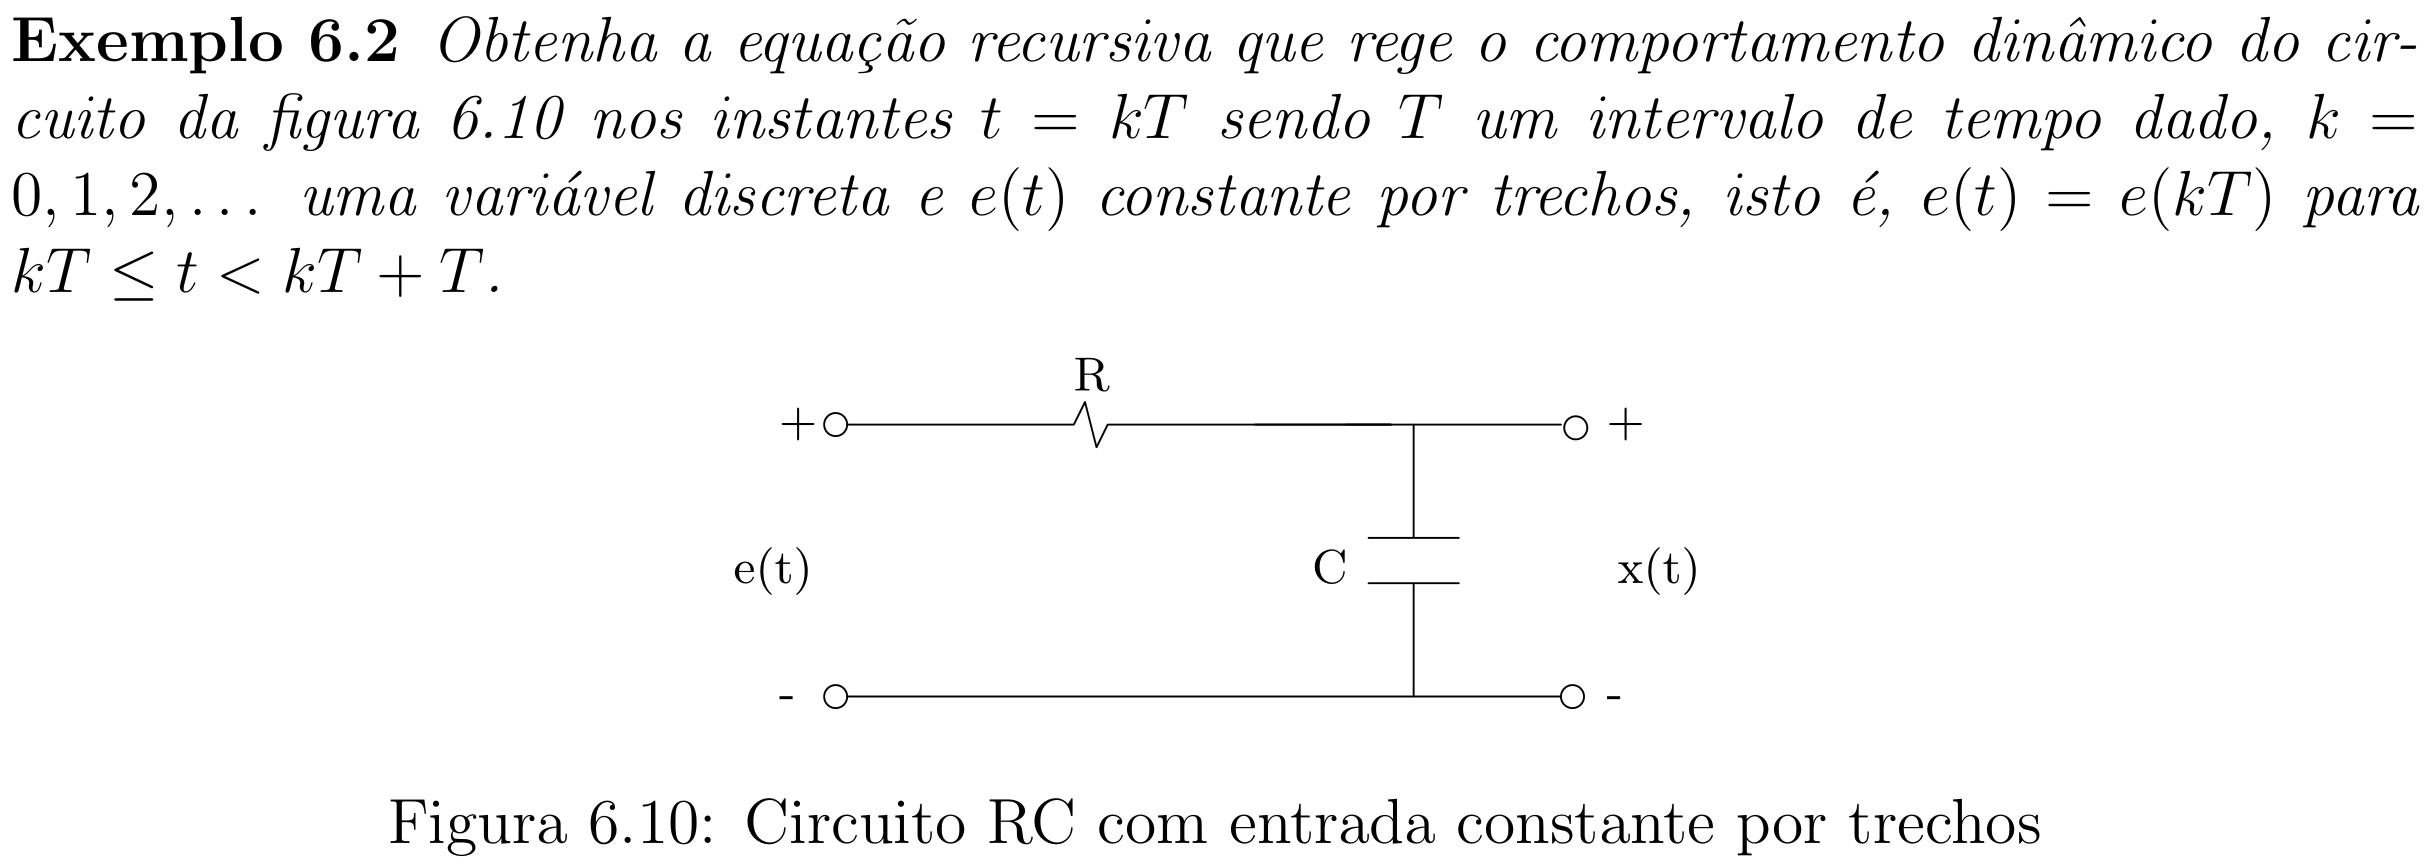

## ($E = 10\,\mathrm{V};R = NT\,\mathrm{\Omega};C = 1000\,\mathrm{u}\mathrm{F}; T_f = NT\cdot10\,\mathrm{ms};T = 5\,\mathrm{ms}$).

## Onde: $NT =$ número de letras do seu nome completo.

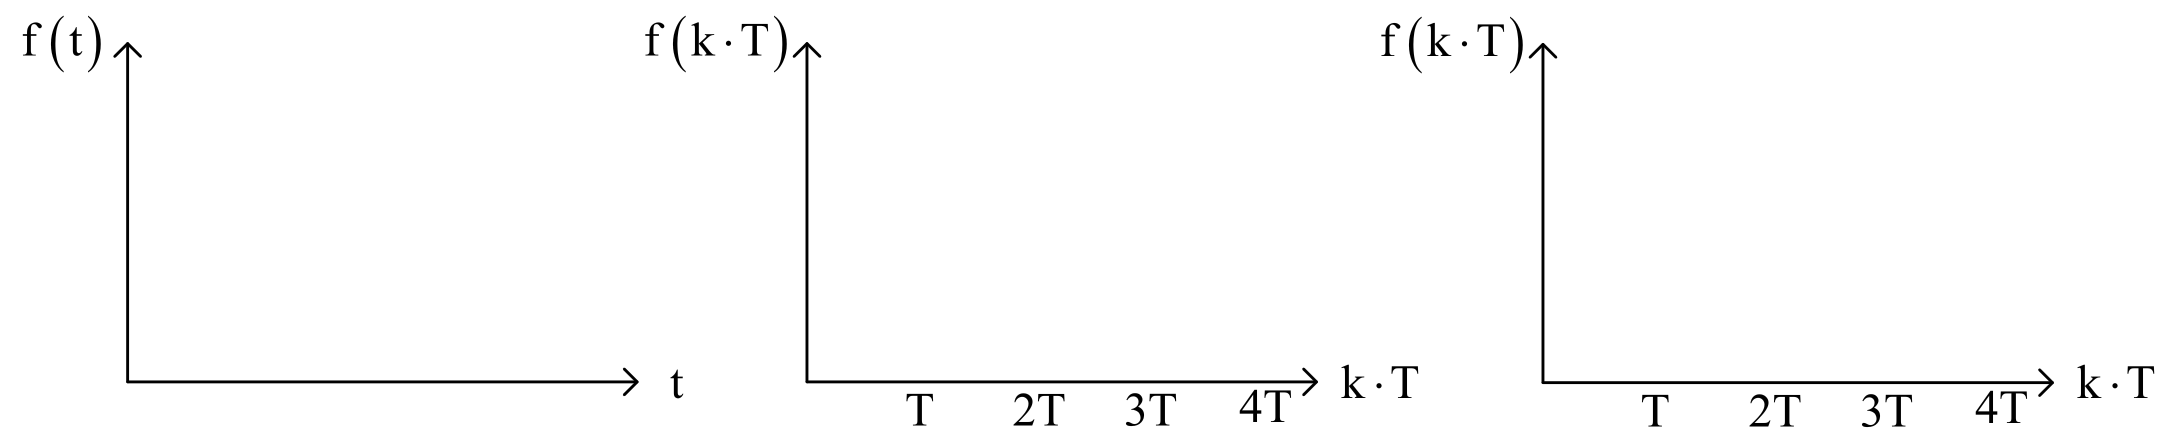

In [1]:
import numpy as np
import control
import math
import cmath
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':[16,9], 'font.size': 22, 'xaxis.labellocation': 'right', 'yaxis.labellocation': 'top'})

In [2]:
NT = 19;              # Gustavo Vianna França = 19 letras
R = NT;
C = 1000e-6;
e = 10;
T = 5e-3;             # período de amostragem
RC = R*C;             # constante RC
Tf = NT*10e-3;        # tempo final de simulação
Kmax = int(Tf/T+1);
a = np.exp(-T/RC);
b = 1-np.exp(-T/RC);
print("a = \n",a);
print("b = \n",b);

a = 
 0.7686205265937358
b = 
 0.2313794734062642


In [3]:
n = 1;
d = [RC,1];
G = control.tf(n,d);
print("G = \n",G);

G = 
 
     1
-----------
0.019 s + 1



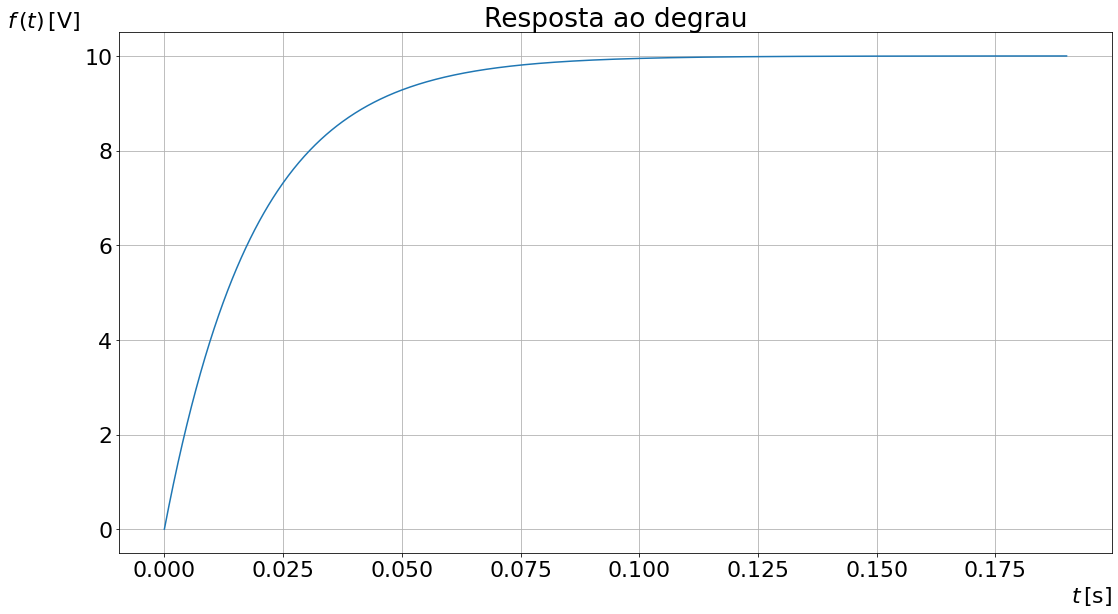

In [4]:
t = np.linspace(0, Tf, 999);
ft = control.step_response(e*G, t)[1];
plt.figure();
plt.plot(t, ft);
plt.title("Resposta ao degrau");
plt.xlabel("$t \, [\mathrm{s}]$");
plt.ylabel("$f \, (t) \, [\mathrm{V}]$", rotation=0);
plt.grid();
plt.tight_layout();
plt.show();

k = 
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38.]
f(kT) = 
 [0.         2.31379473 4.09222486 5.45916276 6.50981929 7.31737547
 7.93807972 8.41516575 8.78186386 9.06371556 9.28035256 9.44686421
 9.57484847 9.67321981 9.74883004 9.80694561 9.85161443 9.88594781
 9.91233714 9.93262053 9.94821076 9.96019372 9.96940408 9.97648335
 9.98192462 9.98610689 9.98932147 9.99179226 9.99369137 9.99515105
 9.996273   9.99713535 9.99779817 9.99830763 9.99869921 9.99900019
 9.99923152 9.99940933 9.999546  ]


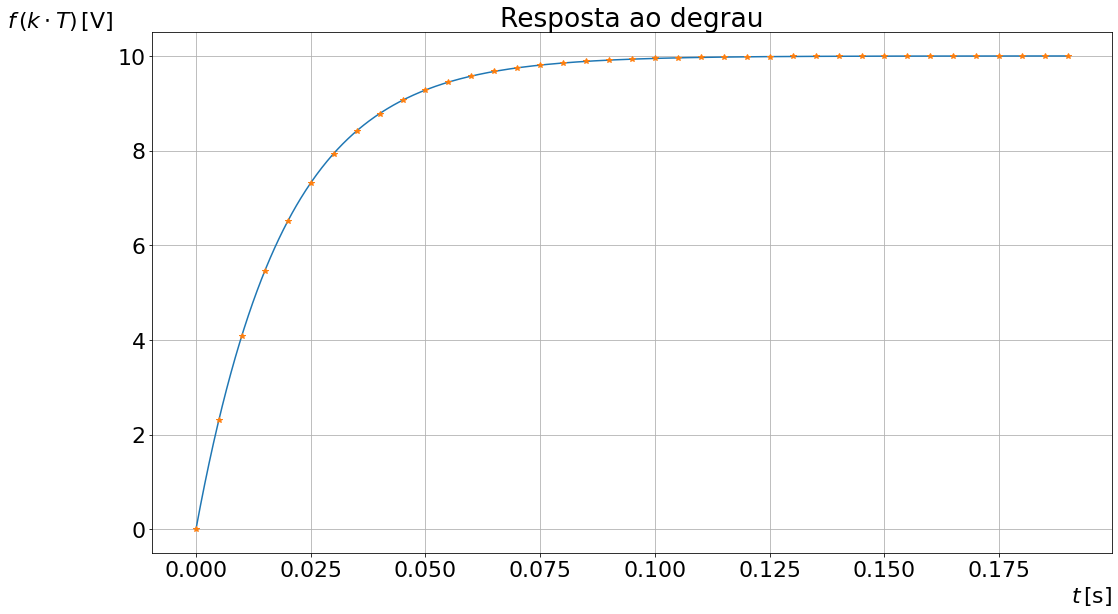

In [5]:
k = np.linspace(0, Tf/T, Kmax);
print("k = \n",k);
fkT = e*(1-np.exp(-k*T/(RC)));
print("f(kT) = \n",fkT);
plt.figure();
plt.title("Resposta ao degrau");
plt.xlabel("$t \, [\mathrm{s}]$");
plt.ylabel("$f \, (k \cdot T) \, [\mathrm{V}]$", rotation=0);
plt.grid();
plt.plot(t,ft,k*T, fkT,'*');
plt.tight_layout();
plt.show();

f(kT) = 
 [0.         2.31379473 4.09222486 5.45916276 6.50981929 7.31737547
 7.93807972 8.41516575 8.78186386 9.06371556 9.28035256 9.44686421
 9.57484847 9.67321981 9.74883004 9.80694561 9.85161443 9.88594781
 9.91233714 9.93262053 9.94821076 9.96019372 9.96940408 9.97648335
 9.98192462 9.98610689 9.98932147 9.99179226 9.99369137 9.99515105
 9.996273   9.99713535 9.99779817 9.99830763 9.99869921 9.99900019
 9.99923152 9.99940933 9.999546  ]


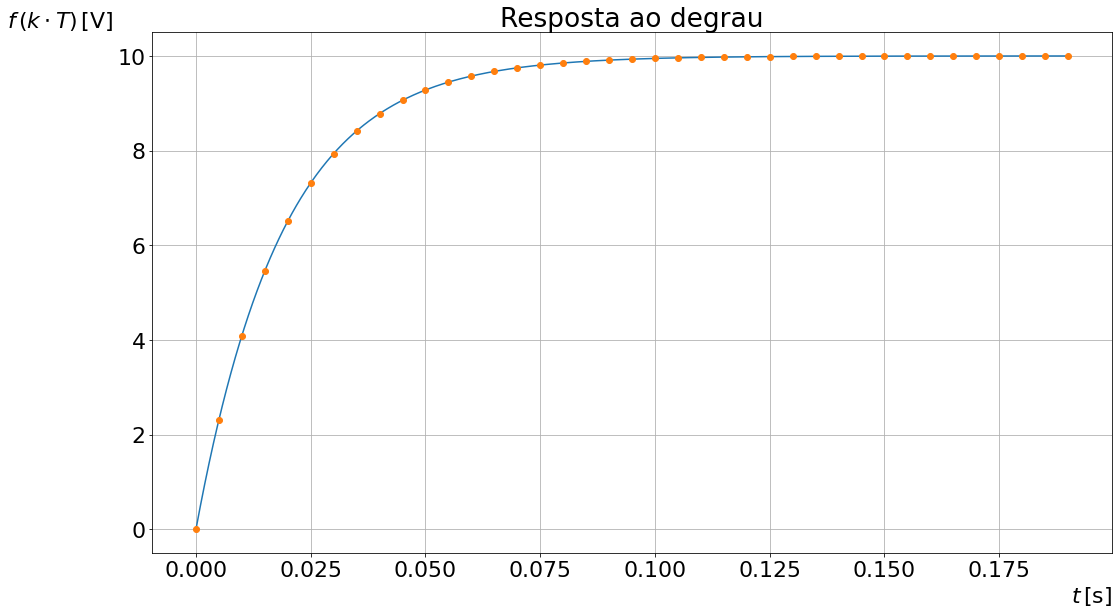

In [6]:
fkT2 = np.zeros(Kmax);
fkT2[0] = 0;   # para k = 0

for j in range(1,Kmax):
    fkT2[j] = a*fkT[j-1] + b*e;  
    
print("f(kT) = \n",fkT2);
plt.figure();
plt.title("Resposta ao degrau");
plt.xlabel("$t \, [\mathrm{s}]$");
plt.ylabel("$f \, (k \cdot T) \, [\mathrm{V}]$", rotation=0);
plt.grid();
plt.plot(t,ft,k*T, fkT2,'o');
plt.tight_layout();
plt.show();